In [1]:
from glob import glob
from astroquery.mast import Mast, Observations
import os
import shutil
import numpy as np
import json
import requests
import asdf
from astropy import log
from astropy import wcs
from astropy.io import ascii, fits
from astropy.utils.data import download_file
from astropy.visualization import simple_norm
from astropy.visualization import ImageNormalize, ManualInterval, LogStretch, LinearStretch
from astropy.wcs.utils import skycoord_to_pixel
from astropy.nddata import extract_array

import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.table import Table

import astropy.units as u

from jwst import assign_wcs#.util.update_fits_wcsinfo
from jwst.datamodels import ImageModel

import sys
sys.path.append('../')

from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams['figure.facecolor'] = 'w'
plt.rcParams['image.origin'] = 'lower'

os.environ["CRDS_PATH"] = "/orange/adamginsburg/jwst/brick/crds/"
os.environ["CRDS_SERVER_URL"] = "https://jwst-crds.stsci.edu"

In [2]:
basepath = '/orange/adamginsburg/jwst/cloudc/'

In [5]:
file = 'jw02221002001_02201_00001_nrcblong'
des = ImageModel(f'{basepath}/F405N/pipeline/{file}_destreak.fits')
cal = ImageModel(f'{basepath}/F405N/pipeline/{file}_cal.fits')

In [4]:
np.fft??

Type:        module
String form: <module 'numpy.fft' from '/blue/adamginsburg/adamginsburg/miniconda3/envs/python39savannah/lib/python3.9/site-packages/numpy/fft/__init__.py'>
File:        /blue/adamginsburg/adamginsburg/miniconda3/envs/python39savannah/lib/python3.9/site-packages/numpy/fft/__init__.py
Source:     
"""
Discrete Fourier Transform (:mod:`numpy.fft`)

.. currentmodule:: numpy.fft

The SciPy module `scipy.fft` is a more comprehensive superset
of ``numpy.fft``, which includes only a basic set of routines.

Standard FFTs
-------------

.. autosummary::
   :toctree: generated/

   fft       Discrete Fourier transform.
   ifft      Inverse discrete Fourier transform.
   fft2      Discrete Fourier transform in two dimensions.
   ifft2     Inverse discrete Fourier transform in two dimensions.
   fftn      Discrete Fourier transform in N-dimensions.
   ifftn     Inverse discrete Fourier transform in N dimensions.

Real FFTs
---------

.. autosummary::
   :toctree: generated/

   

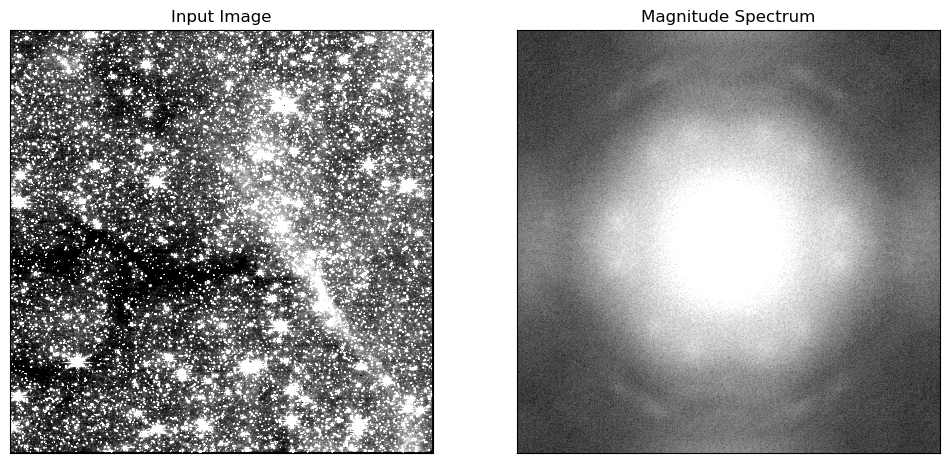

In [23]:
four = np.fft.fft2(np.nan_to_num(cal.data))
fshift = np.fft.fftshift(four)
magnitude_spectrum = 20*np.log(np.abs(fshift))

fig, axs = plt.subplots(1,2, figsize=(12, 12))
minn = 5
maxx = 90

plt.subplot(121),plt.imshow(np.nan_to_num(cal.data), cmap = 'gray', vmin=np.nanpercentile(cal.data.flatten(), minn), vmax=np.nanpercentile(cal.data.flatten(), maxx))
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(magnitude_spectrum, cmap = 'gray', vmin=np.nanpercentile(magnitude_spectrum.flatten(), minn), vmax=np.nanpercentile(magnitude_spectrum.flatten(), maxx))
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

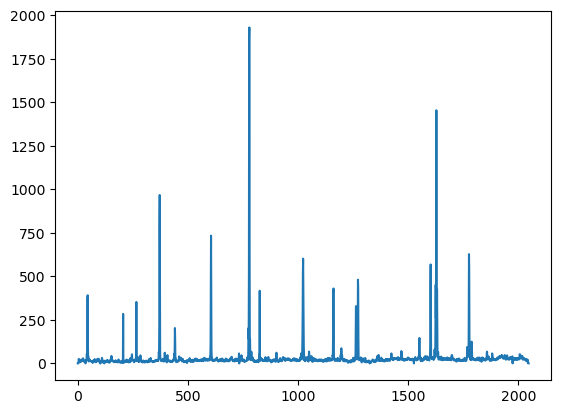

In [34]:
dat = np.nan_to_num(cal.data[50])
plt.plot(dat)

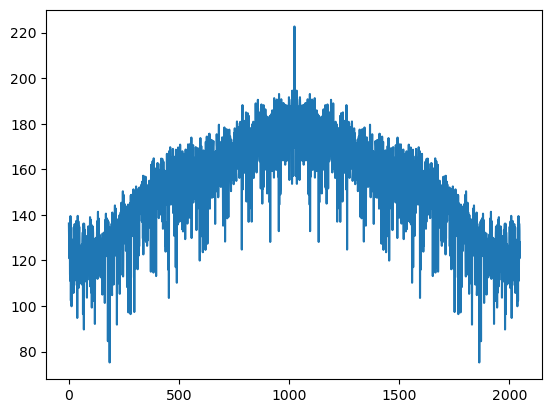

In [37]:
plt.plot(20*np.log(np.abs(np.fft.fftshift(np.fft.fft(dat)))))